In [3]:
import yaml
with open('config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)

In [4]:
import pandas as pd
import numpy as np
from numpy.typing import NDArray
from matplotlib import pyplot as plt
import json

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import category_encoders as ce
from sklearn.utils import shuffle
from typing import List, Tuple

In [6]:
dataset = pd.read_csv(cfg["dataset_maus"])[:10**5]

In [7]:
df = shuffle(dataset)[:10**5]

In [8]:
dataset

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-100002,Source2,3,2016-04-05 15:52:14,2016-04-05 16:52:14,32.731979,-117.111244,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
99996,A-100003,Source2,3,2016-04-05 15:57:10,2016-04-05 16:57:10,33.913029,-118.125389,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
99997,A-100004,Source2,2,2016-04-05 16:02:16,2016-04-05 17:02:16,34.121517,-117.536896,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
99998,A-100005,Source3,2,2016-04-05 16:01:17,2016-04-05 17:01:17,33.995079,-117.361183,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
shuffle(df)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
18198,A-18199,Source2,3,2016-11-22 19:14:08,2016-11-22 19:43:49,37.416134,-121.913368,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
8864,A-8865,Source2,2,2016-12-28 19:03:58,2016-12-28 19:33:39,37.419197,-122.090172,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
68601,A-68603,Source2,3,2016-11-02 10:01:13,2016-11-02 10:35:00,34.200165,-118.338905,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
46839,A-46840,Source2,3,2016-07-06 17:19:30,2016-07-06 18:04:30,33.924347,-117.288780,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
39787,A-39788,Source2,2,2016-05-24 15:06:35,2016-05-24 15:50:00,39.174122,-120.995720,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36483,A-36484,Source2,2,2016-04-27 19:06:32,2016-04-27 20:21:32,37.938988,-121.234550,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
99436,A-99443,Source2,2,2016-04-02 16:25:00,2016-04-02 16:55:00,33.329868,-117.160759,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
78481,A-78488,Source2,3,2016-09-20 18:05:42,2016-09-20 19:05:05,33.705391,-117.954277,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
42640,A-42641,Source2,2,2016-06-18 18:47:29,2016-06-18 19:32:29,38.779613,-121.270454,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day


## Методы обработки данных

### Функции для обработки данных

In [10]:
def conversion_boolean_features(df: pd.DataFrame) -> pd.DataFrame:
    bool_df = df.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'object'])
    for column in bool_df.columns:
        df[column] = df[column].map({True: 1, False: 0}).astype(int)
        
    return df

In [11]:
def add_column_mean_coordinate(start: pd.Series, end: pd.Series) -> pd.Series:
    fill_end = end.fillna(start)
    new_series = (start + fill_end) / 2
    return new_series

def add_mean_coordeenates_parametres(df: pd.DataFrame) -> pd.DataFrame:
    df['Lat'] = add_column_mean_coordinate(df['Start_Lat'], df['End_Lat'])
    df['Lng'] = add_column_mean_coordinate(df['Start_Lng'], df['End_Lng'])
    
    return df

In [12]:
def fill_num_columns(df: pd.DataFrame) -> pd.DataFrame:
    nan_num_column = [
        'Wind_Speed(mph)',
        'Visibility(mi)',
        'Humidity(%)',
        'Temperature(F)',
        'Pressure(in)',
        'Precipitation(in)'
        ]
    
    for col_name in nan_num_column:
        df[col_name] = df.groupby('Severity')[col_name].transform(lambda x: x.fillna(x.mean()))
        
    return df

In [13]:
def delete_emissions(df: pd.DataFrame) -> pd.DataFrame:
    for col, upper_bound, down_bound in (
        ('Distance(mi)', 100, -100),
        ('Temperature(F)', 125, -40),
        ('Pressure(in)', 32, 18),
        ('Visibility(mi)', 85, -85),
        ('Wind_Speed(mph)', 100, -100),
        ("Precipitation(in)",10, -15),
    ):
        df = df.drop(df[df[col] > upper_bound].index)
        df = df.drop(df[df[col] < down_bound].index)
        
    return df

In [14]:
def process_time_parametres(df: pd.DataFrame) -> pd.DataFrame:
    df['Start_Time'] = pd.to_datetime(df['Start_Time']).dt.round("S")
    df['End_Time'] = pd.to_datetime(df['End_Time']).dt.round("S")
    df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp']).dt.round("S")

    df.loc[df['Weather_Timestamp'].isna(), 'Weather_Timestamp'] = df['Start_Time'].loc[df['Weather_Timestamp'].isna()]

    df['Start_Date_Year'] = df['Start_Time'].dt.year
    df['Start_Date_Month'] = df['Start_Time'].dt.month
    df['Start_Date_Day'] = df['Start_Time'].dt.day
    df['Start_Date_Hour'] = df['Start_Time'].dt.hour

    df['End_Date_Year'] = df['End_Time'].dt.year
    df['End_Date_Month'] = df['End_Time'].dt.month
    df['End_Date_Day'] = df['End_Time'].dt.day
    df['End_Date_Hour'] = df['End_Time'].dt.hour

    df['Weather_Datestamp_Year'] = df['Weather_Timestamp'].dt.year
    df['Weather_Datestamp_Month'] = df['Weather_Timestamp'].dt.month
    df['Weather_Datestamp_Day'] = df['Weather_Timestamp'].dt.day
    df['Weather_Datestamp_Hour'] = df['Weather_Timestamp'].dt.hour
    
    return df

In [15]:
new_Twilight_names = {
    'Sunrise_Sunset': 'Is_Day',
    "Civil_Twilight": "Is_Civil_Day",
    "Nautical_Twilight": "Is_Twilight_Day",
    "Astronomical_Twilight": "Is_Astronomical_Day"
}
def rename_Twillight_parametres(df: pd.DataFrame) -> pd.DataFrame:
    for column in new_Twilight_names.keys():
        df[new_Twilight_names[column]] = df[column].map({'Day': 1.0, 'Night': 0.0}).astype(float)
    df.drop(columns=list(new_Twilight_names.keys()), inplace=True)
    
    return df

In [16]:
def rename_Timezone_meanings(df: pd.DataFrame) -> pd.DataFrame:
    df['Timezone'] = df['Timezone'].replace({
        "US/Eastern": "Easterm",
        "US/Central": "Central",
        "US/Pacific": "Pacific",
        "US/Mountain": "Mountain"
    })
    
    return df

In [17]:
def rename_Wind_Direction_paramentres(df: pd.DataFrame) -> pd.DataFrame:
    df['Wind_Direction'] = df['Wind_Direction'].replace({'South': 'S',
                                                                     'West': 'W',
                                                                     'North': 'N',
                                                                     'Variable': 'VAR',
                                                                     'East': 'E',
                                                                     'Calm': 'CALM'
                                                                     })

    df['Wind_Direction'].fillna('VAR', inplace=True)
    
    return df

In [18]:
def drop_excess_parametres(df: pd.DataFrame) -> pd.DataFrame:
    df = df.drop(columns=['ID',
                           'Source',
                           'Start_Lat',
                           'Start_Lng',
                           'End_Lat',
                           'End_Lng',
                           'Wind_Chill(F)',
                           'Country',
                           'Zipcode',
                           'Airport_Code',
                           'Description',
                           'Street',
                           'Weather_Timestamp',
                           'Start_Time',
                           'End_Time',
                           'Turning_Loop'
                           ])
    
    df = df.dropna()
    
    return df

In [19]:
def rename_columns(df: pd.DataFrame) -> pd.DataFrame:
    df = rename_Twillight_parametres(df)
    df = rename_Timezone_meanings(df)
    df = rename_Wind_Direction_paramentres(df)
    
    return df

In [20]:
def data_condersion(df: pd.DataFrame) -> pd.DataFrame:
    
    df = conversion_boolean_features(df)
    df = add_mean_coordeenates_parametres(df)
    df = fill_num_columns(df)
    df = delete_emissions(df)
    df = process_time_parametres(df)
    df = rename_columns(df)
    
    return df
    

### Кодирование признаков

In [21]:
class WeatherEncoder(TransformerMixin, BaseEstimator):
    """
    A transformer class for encoding weather conditions in a dataset.

    It replaces the weather condition words with predefined replacement words and creates binary features
    for each unique word in the weather conditions.

    Attributes:
    -----------
    cfg : dict
        The configuration settings for the encoder.
    words_ : set
        A set containing all the unique words found in the weather conditions.
    median_ : str
        The most frequent weather condition word used as a replacement for missing values.
    replacement_words_ : dict
        A dictionary containing replacement words for specific weather condition words.

    Methods:
    --------
    fit(X: pd.DataFrame, y: np.ndarray = None) -> 'WeatherEncoder':
        Fit the encoder to the input data.

    transform(X: pd.DataFrame) -> pd.DataFrame:
        Transform the input data by encoding the weather conditions into binary features.

    get_feature_names_out() -> List[str]:
        Get the names of the generated binary features.

    """

    def __init__(self, cfg=yaml.safe_load(open('config.yaml'))):
        self.cfg = cfg
        self.words_ = None
        self.median_ = None
        self.replacement_words_ = None
        with open(cfg['type_weather']) as file:
            self.replacement_words_ = json.load(file)

    def fit(self, X: pd.DataFrame, y: np.ndarray = None) -> 'WeatherEncoder':
        """
        This method processes the weather conditions in the input DataFrame, replaces specific words
        with predefined replacement words, handles missing values, and creates a set of unique words.
        """
        self.words_ = set()
        Processed_Weather_Condition = X.dropna().apply(
            lambda x: ' '.join(
                set(
                    sorted(
                        [
                            self.replacement_words_[word] for word in x.split(" ") if word in self.replacement_words_.keys()
                        ]
                    )
                )
            )
        )

        for index in Processed_Weather_Condition.index:
            if 'Mix' in Processed_Weather_Condition[index]:
                Processed_Weather_Condition[index] = 'Mix'

        X = Processed_Weather_Condition.replace({'': np.nan})
        self.median_ = X.mode()[0]
        X.fillna(self.median_, inplace=True)

        for line in X:
            for word in line.split(" "):
                if word not in self.words_:
                    self.words_.add(word)

        return self

    def transform(self, X: pd.DataFrame) -> pd.DataFrame:
        X.fillna(self.median_, inplace=True)
        new_columns = np.zeros((len(X), len(self.words_)), dtype=float)
        for i, line in enumerate(X):
            line_words = set(line.split(" "))
            for k, word in enumerate(self.words_):
                if word in line_words:
                    new_columns[i][k] = 1.0
        return_columns = pd.DataFrame(new_columns, columns=self.get_feature_names_out(), index=X.index)

        return return_columns

    def get_feature_names_out(self) -> List[str]:
        '''Get the names of the generated binary features.'''
        return list(self.words_)


In [22]:
class CustomEncoder(TransformerMixin, BaseEstimator):
    """
    CustomEncoder is a transformer class that applies various encoding techniques to the input data.
    
    Attributes:
    -----------
    encoders : dict
        A dictionary containing different encoding techniques as values, with their corresponding names as keys.
    columns : dict
        A dictionary mapping the names of the encoding techniques to the columns in the input data that need to be encoded.

    Methods:
    --------
    fit(X: pd.DataFrame, y: NDArray = None) -> 'CustomEncoder':
        Fit the encoders on the input data.

    transform(X: pd.DataFrame, y: NDArray = None) -> pd.DataFrame:
        Apply the fitted encoders to transform the input data.

    _fit_encoder(encoder: TransformerMixin, X: pd.DataFrame) -> TransformerMixin:
        Fit a specific encoder on the input data.
    """

    def __init__(self):
        self.encoders = {
            'onehot_encoder' : OneHotEncoder(sparse_output=False, min_frequency=5*10**(-4), handle_unknown="ignore"),
            'count_encoder_city' : ce.CountEncoder(normalize=True),
            'count_encoder_county' : ce.CountEncoder(normalize=True),
            'weather_encoder' : WeatherEncoder(),
            'label_encoder': LabelEncoder(),
        }
        
        self.columns = {
            'onehot_encoder' : ['Timezone', 'Wind_Direction'],
            'count_encoder_city' : 'City',
            'count_encoder_county' : 'County',
            'weather_encoder' : 'Weather_Condition',
            'label_encoder': 'State'
        }
        
    def fit(self, X: pd.DataFrame,  y: NDArray = None) -> 'CustomEncoder':
        '''Fit the encoders on the input data.'''
        for name in self.encoders.keys():
            self.encoders[name].fit(X[self.columns[name]])
        
        return self
    
    def transform(self, X: pd.DataFrame, y: NDArray = None) -> pd.DataFrame:
        '''Apply the fitted encoders to transform the input data.'''
        X['City_Encoded'] = self.encoders['count_encoder_city'].transform(X[self.columns['count_encoder_city']])
        X['County_Encoded'] = self.encoders['count_encoder_county'].transform(X[self.columns['count_encoder_county']])
        
        encoded = pd.Series(self.encoders['label_encoder'].transform(X['State']))
        encoded.index = X.index
        X['State_Encoded'] = encoded
        
        encoded_categorical_columns = pd.DataFrame(self.encoders['onehot_encoder'].transform(X[self.columns['onehot_encoder']]))
        encoded_categorical_columns.columns = self.encoders['onehot_encoder'].get_feature_names_out()
        encoded_categorical_columns.index = X.index
        for column_name in encoded_categorical_columns.columns:
            X[column_name] = encoded_categorical_columns[column_name]
            
        encoded = self.encoders['weather_encoder'].transform(X[self.columns['weather_encoder']])
        for word in self.encoders['weather_encoder'].get_feature_names_out():
            X[word] = encoded[word]
            
        return X
        
    def _fit_encoder(self, encoder: TransformerMixin, X: pd.DataFrame) -> TransformerMixin:
        '''Fit a specific encoder on the input data.'''
        encoder.fit(X)
        return encoder

### Обработка данных

In [23]:
df = data_condersion(df)
df = drop_excess_parametres(df)

In [24]:
target_column = 'Severity'
feature_columns = list(df.columns)
feature_columns.remove(target_column)

X = df[feature_columns]
Y = df[target_column]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
encoder = CustomEncoder()

encoder.fit(x_train)
x_train = encoder.transform(x_train)
x_test = encoder.transform(x_test)

In [27]:
x_train.drop(columns=['Timezone',
                      'Wind_Direction',
                      'Weather_Condition',
                      'State',
                      'County',
                      'City'
                      ], inplace=True)

x_test.drop(columns=['Timezone',
                      'Wind_Direction',
                      'Weather_Condition',
                      'State',
                      'County',
                      'City'
                      ], inplace=True)

In [28]:
feature_columns = list(x_train.columns)

standard_scaler = StandardScaler()
x_train.loc[:, feature_columns] = standard_scaler.fit_transform(x_train)
x_test.loc[:, feature_columns] = standard_scaler.fit_transform(x_test)

# Модели

### KNN

In [29]:
knn = KNeighborsClassifier(n_neighbors=300,
                           metric="euclidean",
                           algorithm="brute",
                           weights="uniform",
                           )

knn.fit(X=x_train, y=y_train)


KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=300)

In [30]:
y_train_pred = knn.predict(X=x_train)
y_test_pred = knn.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.6304568785892158
test=0.6202357963207643


Результаты: 0.628 на train и 0.622 на test
1) при algorithm="brute", weights="uniform" и при различных метриках примерно один и тот же результат на $10^5$, при $10^6$ все примерно также.<br/>
2) Ball_Tree дал примерно такой-же результат
3) KD-tree не улучшает результат
4) при n_neibhors = 300 результаты становятся примерно равными. Из чего можно сделать вывод, что при маленьком числе соседей моель переобучалась. Окончательный результата для обоих датасетов примерно 0.62
5) на $10^6$ работает около 22 минут, из чего следует, что для слишком большого датасете не применим

### Desision Tree

In [31]:
class_weight = {
    1: 1.78, 
    2: 0.50,  
    3: 0.95,
    4: 1.35
    }

In [32]:
tree = DecisionTreeClassifier(max_depth=12,
                              min_samples_leaf=2000,
                              criterion='gini',
                              class_weight=class_weight,
                              random_state=42
                              )
tree.fit(X=x_train, y=y_train)

DecisionTreeClassifier(class_weight={1: 1.78, 2: 0.5, 3: 0.95, 4: 1.35},
                       max_depth=12, min_samples_leaf=2000, random_state=42)

[Text(0.5416666666666666, 0.9444444444444444, 'x[6] <= 0.01\ngini = 0.48\nsamples = 78708\nvalue = [131.72, 21619.0, 33601.5, 35.1]'),
 Text(0.3333333333333333, 0.8333333333333334, 'x[6] <= -0.111\ngini = 0.153\nsamples = 44388\nvalue = [129.94, 21223.5, 1749.9, 35.1]'),
 Text(0.16666666666666666, 0.7222222222222222, 'x[37] <= -0.52\ngini = 0.536\nsamples = 4400\nvalue = [129.94, 1229.5, 1749.9, 35.1]'),
 Text(0.08333333333333333, 0.6111111111111112, 'gini = 0.546\nsamples = 2077\nvalue = [56.96, 672.5, 657.4, 10.8]'),
 Text(0.25, 0.6111111111111112, 'gini = 0.505\nsamples = 2323\nvalue = [72.98, 557.0, 1092.5, 24.3]'),
 Text(0.5, 0.7222222222222222, 'x[19] <= -1.188\ngini = 0.0\nsamples = 39988\nvalue = [0, 19994, 0, 0]'),
 Text(0.4166666666666667, 0.6111111111111112, 'gini = 0.0\nsamples = 2001\nvalue = [0.0, 1000.5, 0.0, 0.0]'),
 Text(0.5833333333333334, 0.6111111111111112, 'gini = 0.0\nsamples = 37987\nvalue = [0.0, 18993.5, 0.0, 0.0]'),
 Text(0.75, 0.8333333333333334, 'x[4] <= -2.

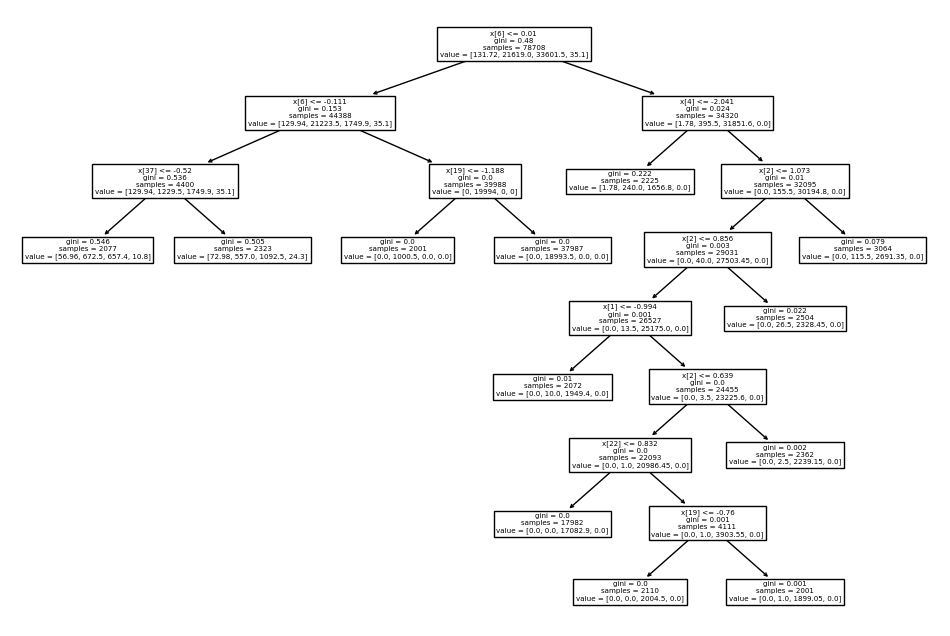

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
plot_tree(tree, ax=ax)

In [34]:
y_train_pred = tree.predict(X=x_train)
y_test_pred = tree.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.9657341058088124
test=0.9656469153369245


Результаты: 
1) Desision tree дает достаточно хорошее пресказание, примерно 0.8 на датасете из $10^6$ элементов. Однако совершенно не угадывает Severity=4
2) Если поэкспериментировать с количеством листов и максимальной глубиной, то можно улучшить результат. Но все равно Severity=4 не угадывается.
3) Изменение с gini на entropy также не изменяет ситуацию
4) при увеличении датасета, начинает угадывать 4, однако перестает 1
5) при max_depth=10, min_samples_leaf=500, criterion='gini' начал угадывать все 4 позиции, при этом доля правильно угаданных приблизительно 0.89
6) Результат получается немного лучше, если поиграться с весами

### Random Forest

In [35]:
random_forest = RandomForestClassifier(n_estimators=10,
                                       max_depth=12,
                                       min_samples_leaf=2000,
                                       criterion="gini",
                                       class_weight=class_weight,
                                       random_state=0,
                                       )
random_forest.fit(X=x_train, y=y_train)

RandomForestClassifier(class_weight={1: 1.78, 2: 0.5, 3: 0.95, 4: 1.35},
                       max_depth=12, min_samples_leaf=2000, n_estimators=10,
                       random_state=0)

In [36]:
y_train_pred = random_forest.predict(X=x_train)
y_test_pred = random_forest.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.9618717284138842
test=0.9590405529017176


Результаты: <br/>
Desision Tree работает лучше, связано это, скорее всего, с тем, что сильно много 2 и 3. Random Forest берет определенные части, при этом еще и пытается использовать различные признаки. В этих частях 2 и 3 слишком много и все сваливается в них.

### Bagging

In [37]:
bagging = BaggingClassifier(n_estimators=50,
                            max_samples=0.8,
                            max_features=0.9,
                            random_state=0,
                            estimator=DecisionTreeClassifier(max_depth=12,
                                                             min_samples_leaf=2000,
                                                             criterion='gini',
                                                             random_state=0
                                                             )
                            )
bagging.fit(X=x_train, y=y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=12,
                                                   min_samples_leaf=2000,
                                                   random_state=0),
                  max_features=0.9, max_samples=0.8, n_estimators=50,
                  random_state=0)

In [38]:
y_train_pred = bagging.predict(X=x_train)
y_test_pred = bagging.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.9652767190120445
test=0.9635633702612054


Результаты:
1) При использовании Bagging с DesisionTreeClassifier и с n_estimators=3, max_samples=0.8, max_features=0.9 результат демонстрируется очень хороший. На $10^5$ около 0.97. При этом угадывает все типы Severity
2) При более большом датасете модель достаточно сильно переобучается. Изменение параметров особо не помогают изменить ситуацию
3) при использовании estimator=DessisionTreeClassifier на всем датасете переобучения не возникает, при этом доля угаданных 0.89. Однако, стоит заметить что 1 и 4 угадывается не очень хорошо

### SVM

In [39]:
svm = SVC(kernel="sigmoid",
          max_iter=8000,
          random_state=0
          )
svm.fit(X=x_train, y=y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=8000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(kernel='sigmoid', max_iter=8000, random_state=0)

In [40]:
y_train_pred = svm.predict(X=x_train)
y_test_pred = svm.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.5084743609290034
test=0.5034048175627605


Результаты:
1) SVM с линейным ядром не эффективен. Угадывание: 0.54
2) SVM с полиномиальным ядром не эффективен. Угадывание: 0.44. Изменение степени полинома не помогает улучшить ситуацию
3) SVM c радиально базовой функцией не эффективен. Угадывание: 0.47
4) SVM c сигмоидой не эффективен. Угадывание: 0.57

### Logistic Regression

In [41]:
logistic_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
logistic_regression.fit(X=x_train, y=y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [42]:
y_train_pred = logistic_regression.predict(X=x_train)
y_test_pred = logistic_regression.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.6399730649997459
test=0.6384287021038724


In [43]:
class BinLogisticClassifier(BaseEstimator):
    def __init__(self, classes: list | None = None) -> None:
        super().__init__()
        self.classes_ = classes
        self._Regressors = [
            LogisticRegression(multi_class="auto", solver="lbfgs"), # x_1, x_2 | x_3, x_4
            LogisticRegression(multi_class="auto", solver="lbfgs"), # x_1 | x_2
            LogisticRegression(multi_class="auto", solver="lbfgs") # x_3 | x_4
        ]
        
    def fit(self, X: NDArray, y: NDArray) -> None:
        train_classes = set(y)
        if self.classes_ == None:
            self.classes_ = list(train_classes)
        elif not self.classes_ == train_classes:
            ValueError("Not all classes were passed during initialization") 
        
        first_cls, second_cls = self.classes_[:2], self.classes_[2:]
        
        y_train_bin = [
            0 if cls in first_cls else 1
            for cls in y 
            ]
        
        self._Regressors[0].fit(X=X, y=y_train_bin)
        
        mask = y.isin(first_cls)
        
        first_X = X.loc[mask]
        second_X = X.loc[~mask]
        
        first_y_train_bin = pd.Series([
            0 if cls == first_cls[0] else 1
            for cls in y.loc[mask]
        ])
        second_y_train_bin = pd.Series([
            0 if cls == second_cls[0] else 1
            for cls in y.loc[~mask]
        ])
        
        self._fit(X=first_X, y=first_y_train_bin, bin_cls=0)
        self._fit(X=second_X, y=second_y_train_bin, bin_cls=1)
        
    def _fit(self, X: pd.DataFrame, y: pd.Series, bin_cls: int) -> None:
        self._Regressors[1 + bin_cls].fit(X=X, y=y)
        
    def predict(self, X: NDArray) -> NDArray:
        y_bin = self._Regressors[0].predict(X=X)
        mask = y_bin == 0
        
        first_X = X.loc[mask]
        second_X = X.loc[~mask]
                
        y_bins = [None, None]
        y_bins[0] = self._predict(first_X, 0)
        y_bins[1] = self._predict(second_X, 1)
        
        k = [-1, -1]
        encoded_classes = list()
        
        for cls in y_bin:
            k[cls] += 1
            encoded_classes.append((cls, y_bins[cls][k[cls]]))
            
        return np.array([
            self._decode(cls) for cls in encoded_classes
        ])
            
    def _predict(self, X: pd.DataFrame, bin_cls: int) -> NDArray:
        return self._Regressors[1 + bin_cls].predict(X=X)
    
    def _decode(self, code: tuple):
        code_book = {
            (0, 0): self.classes_[0],
            (0, 1): self.classes_[1],
            (1, 0): self.classes_[2],
            (1, 1): self.classes_[3]
        }
        return code_book[code]
    

In [44]:
bin_logistic_regression = BinLogisticClassifier([1, 4, 2, 3])
bin_logistic_regression.fit(X=x_train, y=y_train)

In [45]:
y_train_pred = bin_logistic_regression.predict(X=x_train)
y_test_pred = bin_logistic_regression.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

ValueError: Found array with 0 sample(s) (shape=(0, 72)) while a minimum of 1 is required by LogisticRegression.

In [ ]:
class LogisticRegressionReductingClassifier(BaseEstimator):
    def __init__(self, classes: list | None = None) -> None:
        super().__init__()
        self.classes_ = classes
        self._Regressors = [
            LogisticRegression(multi_class="auto", solver="lbfgs"), # x_1, x_2, x_3 | x_4
            LogisticRegression(multi_class="auto", solver="lbfgs"), # x_1,  x_2 | x_3
            LogisticRegression(multi_class="auto", solver="lbfgs") # x_1 | x_2
        ]
        
    def fit(self, X: NDArray, y: NDArray) -> None:
        train_classes = set(y)
        if self.classes_ == None:
            self.classes_ = list(train_classes)
        elif not self.classes_ == train_classes:
            ValueError("Not all classes were passed during initialization") 
            
        for i in range(len(self._Regressors)):
            classes = self.classes_[:len(self._Regressors) + 1 - i]
            mask = y.isin(classes)
            self._fit(X=X[mask], y=y[mask], n_regressor=i, classes=classes)
        
    def _fit(self, X: pd.DataFrame, y: pd.Series, n_regressor: int, classes: list) -> None:
        first_cls, second_cls = classes[:-1], classes[-1]
        
        y_train_bin = [
            0 if cls in first_cls else 1
            for cls in y 
            ]
        
        self._Regressors[n_regressor].fit(X=X, y=y_train_bin)
        
    def predict(self, X: pd.DataFrame) -> NDArray:
        
        y_predict = np.zeros(len(X), dtype=int)
        
        for i in range(len(self._Regressors)):
            y_bin = self._predict(X=X, n_regressor=i)
            mask = y_bin == 0
            X = X.loc[mask]
            k = 0
            for idx, y in enumerate(y_predict):
                if y == 0:
                    if y_bin[k] == 1:
                        y_predict[idx] = self.classes_[-(i + 1)]
                    k += 1
                    
            if len(X) == 0: 
                return y_predict
            
        return y_predict
            
            
    def _predict(self, X: pd.DataFrame, n_regressor: int) -> NDArray:
        return self._Regressors[n_regressor].predict(X=X)
    

In [ ]:
logistic_regression_reducting = LogisticRegressionReductingClassifier([1, 2, 3, 4])
logistic_regression_reducting.fit(X=x_train, y=y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_train_pred = logistic_regression_reducting.predict(X=x_train)
y_test_pred = logistic_regression_reducting.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.640697260761295
test=0.6345665209879052


Результаты:
1) На большом датасете логисчтическая регрессия дает достатточно хороший результат, около 0.8
2) если брать достаточно большой датасет, то проблема в том, что при первой регрессии склоняется ну тада, из-за чего начинаются проблемы и редко угадывает 1 и 4
3) модификации сильно не помогают в исправлении ситуации

### Naive Bassian Classifier

In [ ]:
bassian = GaussianNB()
bassian.fit(X=x_train, y=y_train)

GaussianNB()

In [ ]:
y_train_pred = bassian.predict(X=x_train)
y_test_pred = bassian.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.03223306398333079
test=0.5547311718670597


Результаты: <br/>
Все плохо, так как данные не сбалансированы. + не стоит забывать о том, что предполагается, что данные не коррелируют. У нас немного не так

### Linear Discriminant Analysis

In [ ]:
discriminant_analyse = LinearDiscriminantAnalysis(solver='lsqr')
discriminant_analyse.fit(X=x_train, y=y_train)

LinearDiscriminantAnalysis(solver='lsqr')

In [ ]:
y_train_pred = discriminant_analyse.predict(X=x_train)
y_test_pred = discriminant_analyse.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.6357041215632464
test=0.6286716129687976


Результаты: <br/>
Аналогичные проблемы как с Logistic Regression

### Gradient Boosting

In [47]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X=x_train, y=y_train)

GradientBoostingClassifier()

In [48]:
y_train_pred = gradient_boosting.predict(X=x_train)
y_test_pred = gradient_boosting.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.9861386390201758
test=0.9790629128976522


In [49]:
hist_gradient_boosting = HistGradientBoostingClassifier(loss='log_loss',
                                                        max_iter=500,
                                                        max_leaf_nodes=1000,
                                                        min_samples_leaf=800,
                                                        max_depth=10,
                                                        l2_regularization=10**(-1),
                                                        tol=10**(-7),
                                                        class_weight=None,
                                                        random_state=0
                                                        )
hist_gradient_boosting.fit(X=x_train, y=y_train)

HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=10,
                               max_iter=500, max_leaf_nodes=1000,
                               min_samples_leaf=800, random_state=0)

In [50]:
y_train_pred = hist_gradient_boosting.predict(X=x_train)
y_test_pred = hist_gradient_boosting.predict(X=x_test)

print(
    f"train={accuracy_score(y_true=y_train, y_pred=y_train_pred)}"
    "\n"
    f"test={accuracy_score(y_true=y_test, y_pred=y_test_pred)}"
    )

train=0.9971667428977995
test=0.9833824575668259


Результаты:
1) Обычный градиентный бустинг работает очень долго. На $10^5$ около $1.5$ минуты
2) Работает очень хорошо, однако переобучается (оба, с hist даже сильнее)
3) немного подкрутив параметры можно немного улучшить результат и снизить переобучение
4) Попытка поработать с весами не дает серьезных улучшений
5) Работает гораздо дольше, чем деревья решений на всем датасете (около 34 минут, предсказания около 7 минут)
6) В целом, результат лучше примерно на 0.05. Однако стоит заметить, что 1 и 4 класс аварий определяются значительно лучше

In [51]:
count_predicted_Severity = dict.fromkeys([1, 2, 3, 4], 0)
count_real_Severity = dict.fromkeys([1, 2, 3, 4], 0)

for p, r in zip(y_test_pred, y_test):
    count_real_Severity[r] += 1
    count_predicted_Severity[p] += 1
    
count_real_Severity, count_predicted_Severity

({1: 21, 2: 10887, 3: 8763, 4: 7}, {1: 11, 2: 10980, 3: 8681, 4: 6})

### Выводы:
1) лучшие модели для нашей задачи: 1.Gradient Boosting, 2.Bagging, 3.Desision Tree
2) Desision Tree значительно превосхоит по времени других алгоритмов, при этом точность не сильно ниже
3) KNN показывает не очень хорошие рещультаты, к тому же работает достаточно долго
4) SVM плохо применим из-за того, что данные имеют достаточно сложную структуру
5) Баесовских классификатор не дает хорошего результата из-за того, что между данные есть определенная классификация и они абсолютно не сбалансированы
6) Логисчитеская регрессия и дискриминантный анализ показывают хорошие результаты, но плохо определяют 1 и 4. Модификации логистической регрессии слабо исправляют ситуацию
7) Идеальной моделю по времени и точности является Bagging с Desision Tree

## Cross-validation

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline , make_pipeline


In [63]:
models = [
    ('tree', tree),
    ('random_forest', random_forest)
]

In [64]:
for name, model in models:
    print(name, end=', ')
    pipeline = Pipeline(steps=[
        ('model', model)
    ])
    pipeline.fit(X=x_train, y=y_train)
    cv = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy')
    print(cv.mean())
    

tree, 0.9574376513807863
random_forest, 0.8797713190310329
